In [1]:
import pandas as pd

In [20]:
train_data = pd.read_csv('/content/drive/MyDrive/ASL_MNIST/sign_mnist_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ASL_MNIST/sign_mnist_train.csv')

In [7]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [21]:
x_train = train_data.drop(columns=['label'])
y_train = train_data['label']

x_test = test_data.drop(columns=['label'])
y_test = test_data['label']
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [22]:
import tensorflow as tf

x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
x_train.shape

TensorShape([27455, 784])

In [23]:
x_test.shape

TensorShape([27455, 784])

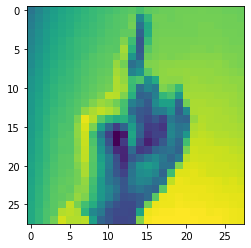

In [13]:
import matplotlib.pyplot as plt
x_train_2 = tf.reshape(x_train, shape=(27455, 28, 28))
plt.imshow(x_train_2[0])

In [25]:
x_train = tf.reshape(x_train, shape=(27455, 28, 28, 1))
x_test = tf.reshape(x_test, shape=(27455, 28, 28, 1))

In [15]:
y_train.shape

TensorShape([27455])

In [ ]:
y_train = tf.reshape(y_train, [27455, 1])
y_test = tf.reshape(y_test, [27455, 1])

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import Sequential

model_1 = Sequential([
    Conv2D(100, 3, input_shape=(28, 28, 1), activation='relu'),
    Conv2D(100, 3, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(100, 3, activation='relu'),
    Conv2D(100, 3, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(29, activation='softmax')
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer='adam',
                metrics=['accuracy'])

model_1.fit(x_train, y_train, epochs=10)

Epoch 1/10
858/858 [==============================] - 185s 215ms/step - loss: 0.6033 - accuracy: 0.8581
Epoch 2/10
858/858 [==============================] - 184s 215ms/step - loss: 0.0175 - accuracy: 0.9946
Epoch 3/10
858/858 [==============================] - 183s 214ms/step - loss: 6.9749e-05 - accuracy: 1.0000
Epoch 4/10
858/858 [==============================] - 183s 214ms/step - loss: 2.0114e-05 - accuracy: 1.0000
Epoch 5/10
858/858 [==============================] - 184s 215ms/step - loss: 1.1236e-05 - accuracy: 1.0000
Epoch 6/10
858/858 [==============================] - 183s 214ms/step - loss: 6.8191e-06 - accuracy: 1.0000
Epoch 7/10
858/858 [==============================] - 184s 214ms/step - loss: 4.2813e-06 - accuracy: 1.0000
Epoch 8/10
858/858 [==============================] - 185s 215ms/step - loss: 2.6686e-06 - accuracy: 1.0000
Epoch 9/10
858/858 [==============================] - 185s 215ms/step - loss: 1.6640e-06 - accuracy: 1.0000
Epoch 10/10
858/858 [===============

In [28]:
model_1.evaluate(x_test, y_test)

858/858 [==============================] - 58s 66ms/step - loss: 8.0222e-07 - accuracy: 1.0000


[8.022184374567587e-07, 1.0]

In [29]:
model_1.save('/content/drive/MyDrive/ASL_models/CNN_ASL_MNIST_1.h5')

In [30]:
model_1.save('/content/drive/MyDrive/ASL_models/CNN_ASL_MNIST_1.tflite')

In [33]:
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(model_1)

tfmodel = converter.convert()
open('/content/drive/MyDrive/ASL_models/CNN_ASL_MNIST_1.tflite', "wb").write(tfmodel)

1274980